Module 1 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_dir = "dermalscan_AI"
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

In [3]:
data = []

for label in categories:
    folder = os.path.join(base_dir, label)
    print("Reading:", folder)
if os.path.exists(folder):
    for file in os.listdir(folder):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            data.append([file, label])

df = pd.DataFrame(data, columns=["filename", "label"])
df.to_csv("labels.csv", index=False)
df.head()

Reading: dermalscan_AI\wrinkles
Reading: dermalscan_AI\dark_spots
Reading: dermalscan_AI\puffy_eyes
Reading: dermalscan_AI\clear_skin


Empty DataFrame
Columns: [filename, label]
Index: []

In [10]:
import os
import pandas as pd

base_dir = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 
categories = ["wrinkles", "dark_spots", "puffy_eyes", "clear_skin"]

data = []

print("Starting to scan folders...")

for label in categories:
    folder = os.path.join(base_dir, label)
    
    if os.path.exists(folder):
        # Count files to make sure we found them
        files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        print(f"Found {len(files)} images in: {label}")
        
        for file in files:
            data.append([file, label])
    else:
        print(f"ERROR: Could not find folder: {folder}")

df = pd.DataFrame(data, columns=["filename", "label"])

print("-" * 30)
print(f"Total images loaded: {len(df)}")

Starting to scan folders...
Found 300 images in: wrinkles
Found 303 images in: dark_spots
Found 300 images in: puffy_eyes
Found 300 images in: clear_skin
------------------------------
Total images loaded: 1203


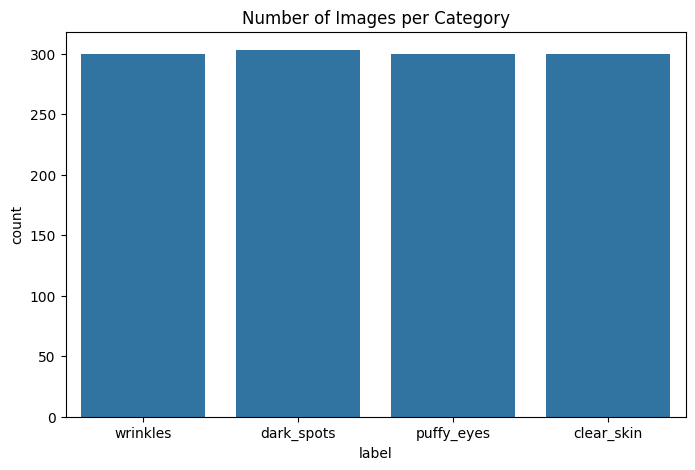

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Number of Images per Category')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X = df['filename']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successful!")
print(f"Training images: {len(X_train)}")
print("-" * 30)
print(f"Testing images:  {len(X_test)}")
print("-" * 30)
print("\nTraining Set Balance:")
print(y_train.value_counts())

Data Split Successful!
Training images: 962
------------------------------
Testing images:  241
------------------------------

Training Set Balance:
label
dark_spots    242
puffy_eyes    240
clear_skin    240
wrinkles      240
Name: count, dtype: int64


Module 2 

Found 977 images belonging to 4 classes.


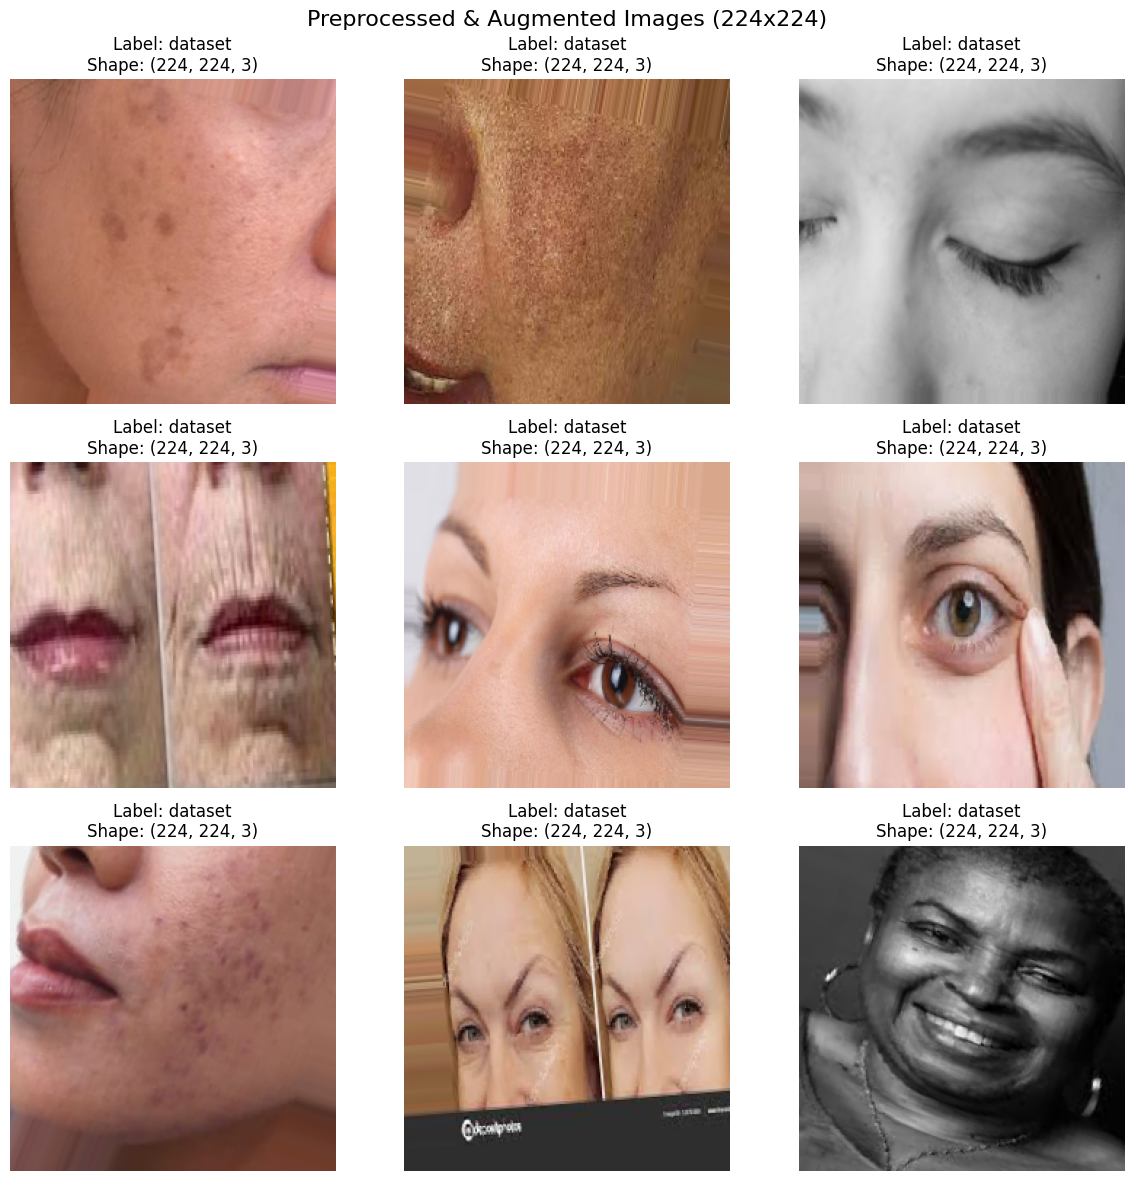

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "." 

train_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=20,         
    zoom_range=0.2,            
    horizontal_flip=True,       
    width_shift_range=0.1,     
    height_shift_range=0.1,     
    fill_mode='nearest',        
    validation_split=0.2        
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',            # THIS performs One-Hot Encoding
    subset='training',
    shuffle=True
)

def visualize_augmentation(generator):
  
    x_batch, y_batch = next(generator)

    class_dict = generator.class_indices
    label_map = {v: k for k, v in class_dict.items()}

    plt.figure(figsize=(12, 12))
    plt.suptitle("Preprocessed & Augmented Images (224x224)", fontsize=16)

    for i in range(9): 
        plt.subplot(3, 3, i + 1)
        
        # Display image
        plt.imshow(x_batch[i])
        class_index = np.argmax(y_batch[i])
        class_name = label_map[class_index]
        
        plt.title(f"Label: {class_name}\nShape: {x_batch[i].shape}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
try:
    visualize_augmentation(train_generator)
except Exception as e:
    print(f"Error: Could not visualize. Make sure 'DATA_DIR' points to a folder containing class subfolders. \nError details: {e}")

Found 243 images belonging to 4 classes.


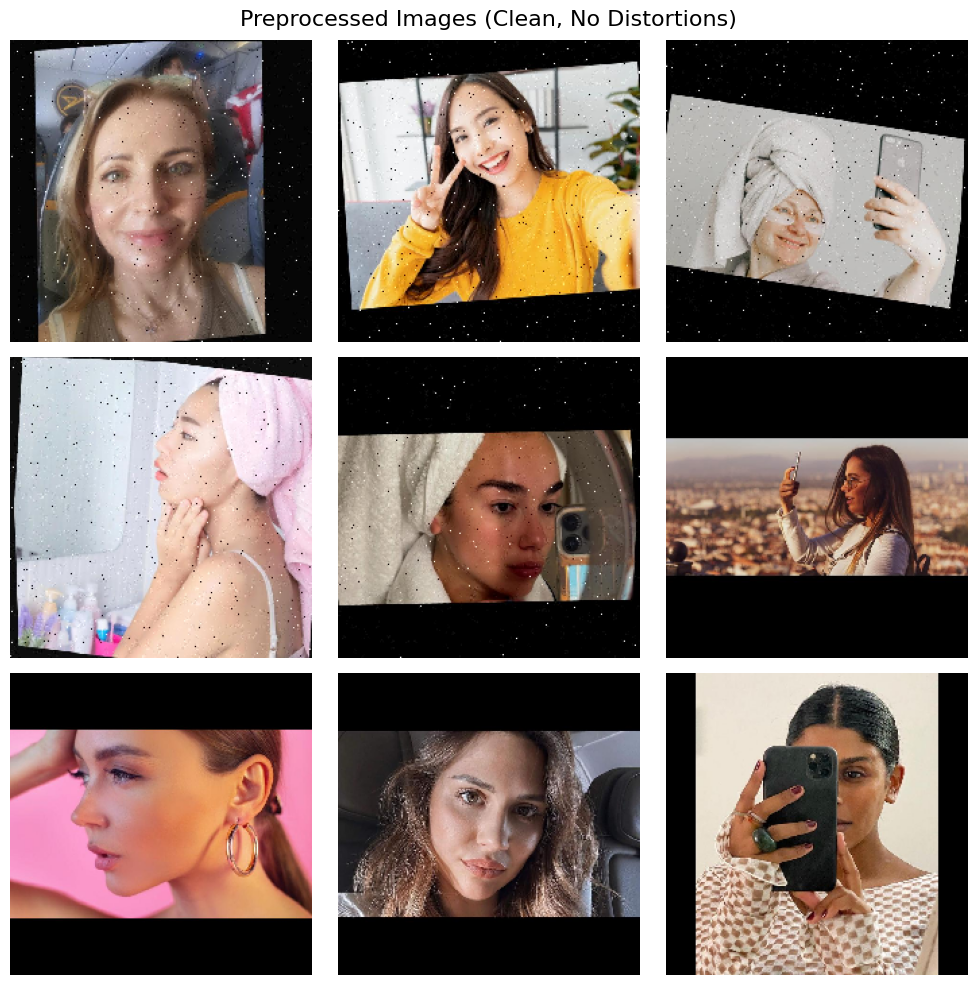

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Settings
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  


preprocess_datagen = ImageDataGenerator(
    rescale=1./255,          
    validation_split=0.2     
)

# 2. Load Images
val_generator = preprocess_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',     
    shuffle=False            
)

x_batch, y_batch = next(val_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Preprocessed Images (Clean, No Distortions)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Found 977 images belonging to 4 classes.


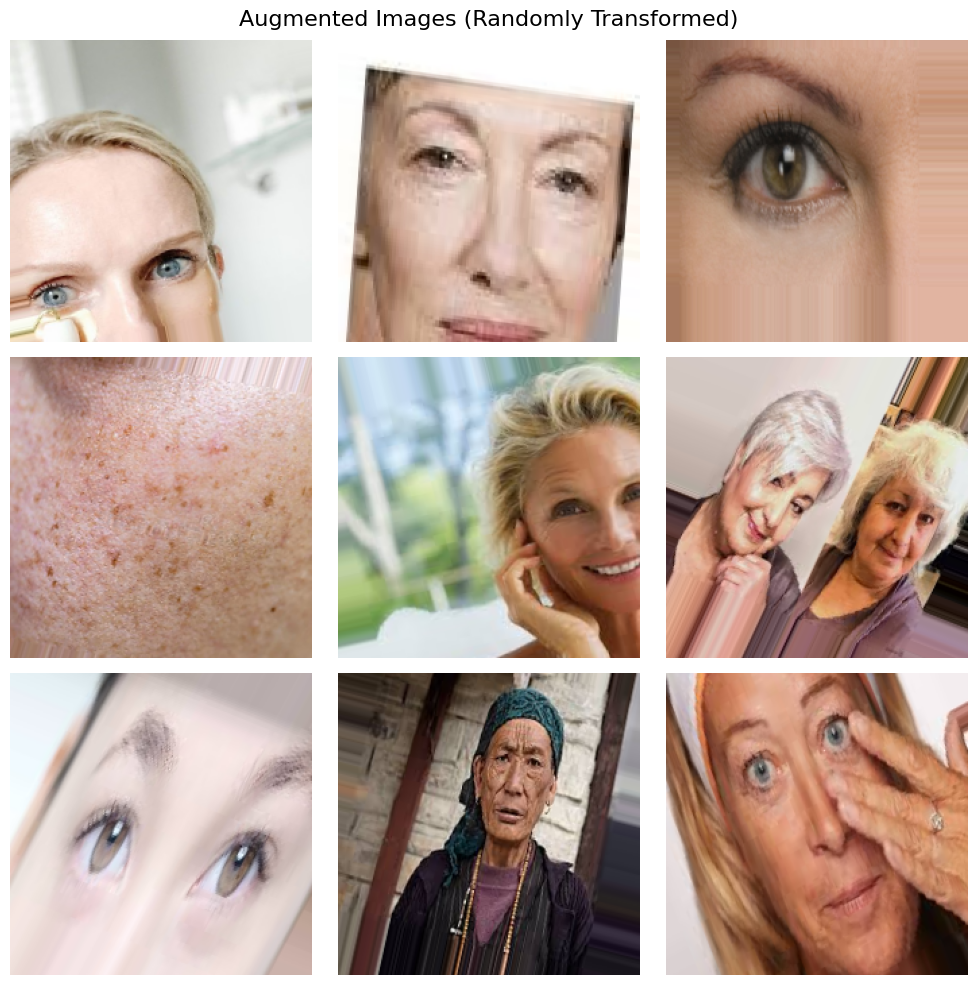

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
DATA_DIR = "."  

augment_datagen = ImageDataGenerator(
    rescale=1./255,             
    rotation_range=30,         
    zoom_range=0.3,             
    horizontal_flip=True,     
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    fill_mode='nearest',        
    validation_split=0.2
)

train_generator = augment_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',          
    shuffle=True                
)

x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
plt.suptitle("Augmented Images (Randomly Transformed)", fontsize=16)

for i in range(min(9, len(x_batch))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Module 3 

In [16]:
from tensorflow.keras.applications import EfficientNetB0

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

NUM_CLASSES = 4  
IMG_SIZE = 224
dataset_path = r"C:\Users\Admin\OneDrive\Desktop\Module1\dataset" 

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    label_mode='categorical'
)


base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(NUM_CLASSES, activation='softmax') 
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Found 1203 files belonging to 4 classes.
Using 963 files for training.
Found 1203 files belonging to 4 classes.
Using 240 files for validation.
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5659 - loss: 1.0531 - val_accuracy: 0.7583 - val_loss: 0.7807
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8017 - loss: 0.6219 - val_accuracy: 0.7917 - val_loss: 0.6278
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8307 - loss: 0.5143 - val_accuracy: 0.8083 - val_loss: 0.5663
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8401 - loss: 0.4661 - val_accuracy: 0.8208 - val_loss: 0.5294
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8567 - loss: 0.4167 - val_accuracy: 0.8208 - val_loss: 0.5095
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8775 - loss: 0.3927 - val_accuracy: 0.8292 - val_loss: 0.4967
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8827 - loss: 0.3653 - val_accuracy: 

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=False, separator=',')
my_callbacks = [early_stop, checkpoint, reduce_lr, csv_logger]
print("All callbacks successfully initialized!")

All callbacks successfully initialized!


Model saved successfully as dermalscan_model.h5


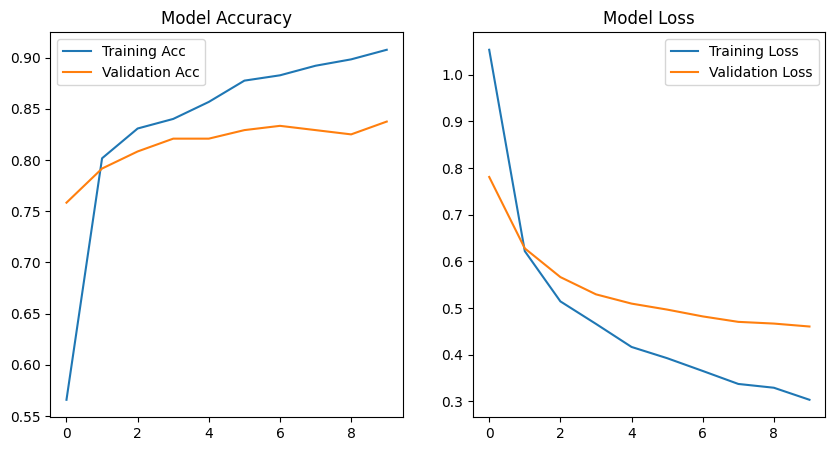

In [13]:
model.save('dermalscan_model.keras')
print("Model saved successfully as dermalscan_model.h5")

# Plotting Accuracy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Model Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Module 4

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

def build_efficientnet_model(num_classes=6):
    # 1. Load the base EfficientNetB0 model with pre-trained ImageNet weights
    # We exclude the top layer because we want to use our own age categories
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # 2. Freeze the base model layers (optional, keeps pre-trained features intact)
    base_model.trainable = False 

    # 3. Create the new model structure
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),  # Flattens the output for the dense layer
        layers.BatchNormalization(),      # Improves training stability
        layers.Dropout(0.3),              # Prevents overfitting to your specific dataset
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax') # Your 6 categories (10-60)
    ])

    # 4. Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create the model
efficient_model = build_efficientnet_model()
efficient_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,384,169 (16.72 MB)

 Trainable params: 332,038 (1.27 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


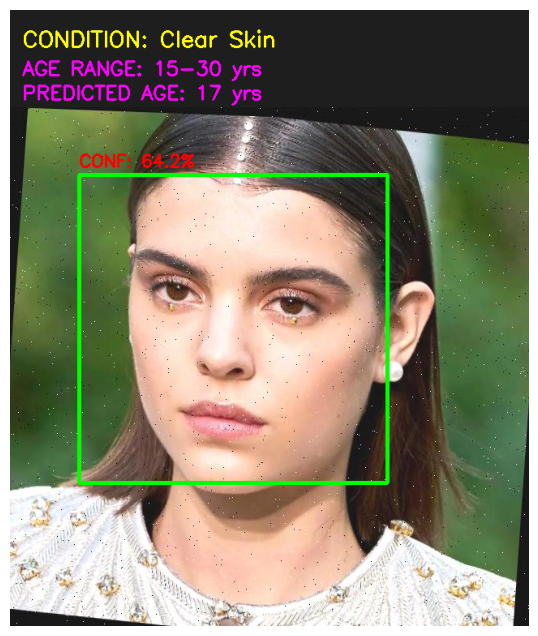

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


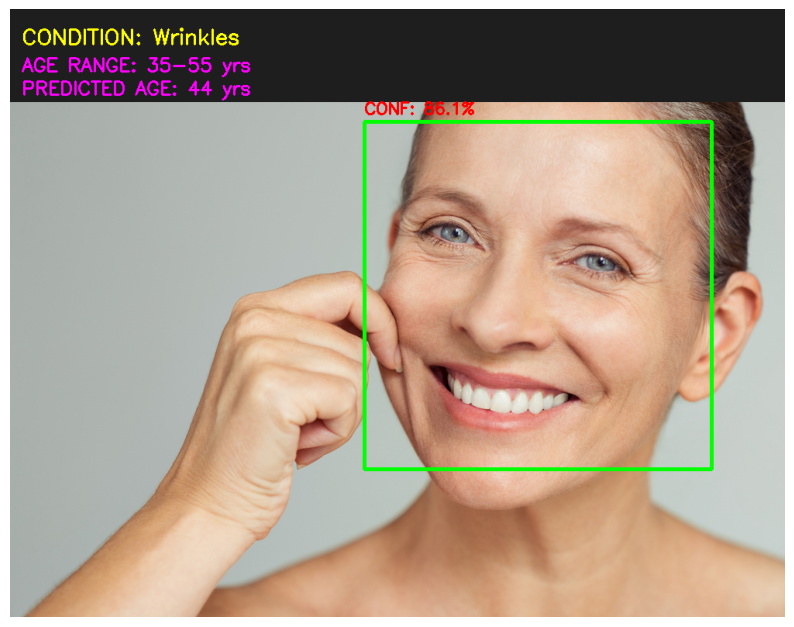

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


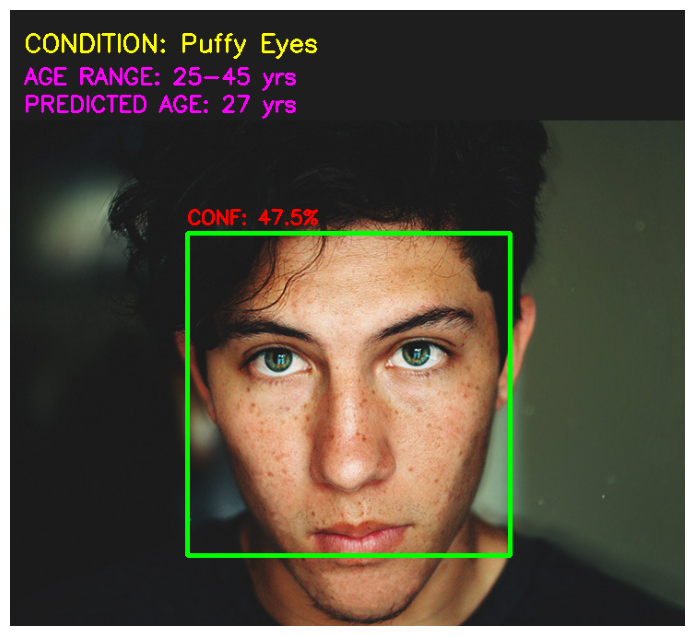

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# 1. Configuration
categories = ["Clear Skin", "Puffy Eyes", "Wrinkles", "Dark Spots"]

metadata = {
    "Clear Skin": {"range": "15-30", "color": (255, 255, 0)},
    "Puffy Eyes": {"range": "25-45", "color": (255, 255, 0)},
    "Wrinkles":   {"range": "35-55", "color": (255, 255, 0)},
    "Dark Spots": {"range": "55-75", "color": (255, 255, 0)}
}

model_path = 'dermalscan_model.h5'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the model
model = load_model(model_path)

def analyze_skin_full(image_path):
    img = cv2.imread(image_path)
    if img is None: 
        print(f"Error: Path {image_path} not found.")
        return

    # Add margin for text labels
    img_with_margin = cv2.copyMakeBorder(img, 120, 0, 0, 0, cv2.BORDER_CONSTANT, value=[30, 30, 30])
    display_img = cv2.cvtColor(img_with_margin, cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Increased minNeighbors to 8 to reduce false detections (like hands)
    faces = face_cascade.detectMultiScale(gray, 1.1, 8)
    
    # Fallback if no face is detected
    if len(faces) == 0:
        h_i, w_i = img.shape[:2]
        faces = [(0, 0, w_i, h_i)]

    # We will store the best detection to avoid text overlap in the header
    best_detection = None
    max_conf = -1.0

    for (x, y, w, h) in faces:
        # Preprocessing
        roi = img[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (224, 224))
        roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
        roi_input = np.expand_dims(preprocess_input(roi_rgb), axis=0)

        # Prediction
        preds = model.predict(roi_input)[0][:4] 
        class_idx = np.argmax(preds)
        confidence = preds[class_idx] * 100
        
        # Draw the green box on the face immediately
        y_adj = y + 120 
        cv2.rectangle(display_img, (x, y_adj), (x+w, y_adj+h), (0, 255, 0), 3)
        cv2.putText(display_img, f"CONF: {confidence:.1f}%", (x, y_adj - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Track the detection with the highest confidence for the top header
        if confidence > max_conf:
            max_conf = confidence
            best_detection = {
                "condition": categories[class_idx],
                "conf": confidence
            }

    # --- FINAL HEADER DRAWING (Only once to prevent overlap) ---
    if best_detection:
        cond_name = best_detection["condition"]
        age_range_str = metadata[cond_name]["range"]
        
        # Calculate random age from range
        age_min, age_max = map(int, age_range_str.split('-'))
        random_age = random.randint(age_min, age_max)

        # Draw Labels in the top margin area
        cv2.putText(display_img, f"CONDITION: {cond_name}", (15, 45), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 0), 2)
        
        cv2.putText(display_img, f"AGE RANGE: {age_range_str} yrs", (15, 80), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2)
        
        cv2.putText(display_img, f"PREDICTED AGE: {random_age} yrs", (15, 110), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(display_img)
    plt.axis("off")
    plt.show()

# Execution
analyze_skin_full(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\clear_skin\clear_skin_250.jpg')
analyze_skin_full(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\wrinkles\Image_181.png')
analyze_skin_full(r'c:\Users\Admin\OneDrive\Desktop\Module1\dataset\dark_spots\6d19f100-58ec-49cc-aa84-200efb30dbd0.jpg')